<font color="blue"><strong>Ejercicio 1.</strong> Importa los datos del fichero ''Juegos.csv''. Se pide:

* Coge la variable VentasEEUU, calcula los cuartiles y dibuja su boxplot
*  Define la variable datos como los valores de VentasEEUU que estén entre 0.1 y 1.
* Calcula sus deciles y cuartiles. 
* Calcula mediante su definición el rango intercuartílico
* Indica a partir de qué valores se considera que un dato es atípico. 
* Dibuja el boxplot de datos explicando lo que representa.
* Se quiere partir los datos en tres categorías de modo que en la primera esté el 20 $\%$ de los juegos menos vendidos, en la tercera el 20 $\%$ de los más vendidos y los demás en la categoría dos. ¿Cómo puede hacerse? Comprueba que en la primera categoría hay aproximadamente un 20 $\%$ de los datos ¿por qué no hay exactamente el 20 $\%$?
* Dibuja los histogramas de las variables VentasEU, VentasEEUU, VentasOtros, filtradas previamente para que se consideren solo valores de las variables en el intervalo $]0.1, 1[$. Dibuja también un histograma de la variable Fecha.</font>

<strong>Solución.</strong>  
Comenzamos leyendo el fichero ``Juegos.csv''

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
juegos = pd.read_csv('Juegos.csv')
juegos

,Nombre,Plataforma,Fecha,Genero,VentasEEUU,VentasEU,VentasJP,VentasOtros,Ventas
0,Wii Sports,Wii,2006.0,Sports,41.49,29.02,3.77,8.46,82.74
1,Mario Kart Wii,Wii,2008.0,Racing,15.85,12.88,3.79,3.31,35.82
2,Wii Sports Resort,Wii,2009.0,Sports,15.75,11.01,3.28,2.96,33.00
3,New Super Mario Bros.,DS,2006.0,Platform,11.38,9.23,6.50,2.90,30.01
4,Wii Play,Wii,2006.0,Misc,14.03,9.20,2.93,2.85,29.02
...,...,...,...,...,...,...,...,...,...
16154,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.00,0.01
16155,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.00,0.01
16156,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.00,0.01
16157,Know How 2,DS,2010.0,Puzzle,0.00,0.01,0.00,0.00,0.01


Respondemos ahora a:
<font color="blue"> 
* Coge la variable VentasEEUU, calcula los cuartiles y dibuja su boxplot. </font>

In [3]:
VentasEEUU=juegos["VentasEEUU"]
Q1=np.quantile(VentasEEUU,0.25)
Q2=np.quantile(VentasEEUU,0.5)
Q3=np.quantile(VentasEEUU,0.75)
[Q1,Q2,Q3]

[0.0, 0.08, 0.23]

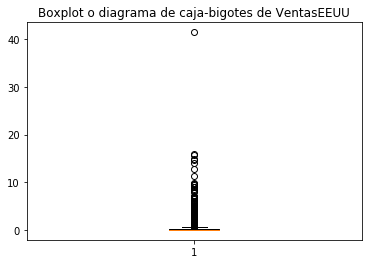

In [4]:
plt.boxplot(VentasEEUU) 
plt.title('Boxplot o diagrama de caja-bigotes de VentasEEUU') 
plt.show()

Para entender el boxplot (diagrama de caja y bigotes) quizás deberíamos cancular el rango intercuartílico y, a partir de él, los valores atípicos de VentasEEUU:

In [5]:
R=Q3-Q1
R
[o1,o2]=[Q1-1.5*R,Q3+1.5*R]
[o1,o2]   # La "o" viene de "outlier", que es la forma inglesa de "valor atípico"

[-0.34500000000000003, 0.5750000000000001]

In [6]:
VentasEEUU_atipicos = VentasEEUU[(VentasEEUU >= o2) | (VentasEEUU <= o1)]
VentasEEUU_atipicos

0       41.49
1       15.85
2       15.75
3       11.38
4       14.03
        ...  
3051     0.58
3064     0.59
3067     0.59
3088     0.58
3113     0.58
Name: VentasEEUU, Length: 1643, dtype: float64

In [7]:
VentasEEUU_tipicos = VentasEEUU[(VentasEEUU >= o1) & (VentasEEUU <= o2)] 
VentasEEUU_tipicos

124      0.07
146      0.47
194      0.00
198      0.57
200      0.28
         ... 
16154    0.01
16155    0.01
16156    0.00
16157    0.00
16158    0.01
Name: VentasEEUU, Length: 14516, dtype: float64

Ahora respondemos a:
    
<font color="blue"> 
*  Define la variable datos como los valores de VentasEEUU que estén entre 0.1 y 1.
</font>


In [8]:
datos = VentasEEUU[(VentasEEUU >= 0.1) & (VentasEEUU <= 1)]
datos

74       0.98
101      0.78
110      0.84
113      0.79
135      0.66
         ... 
10123    0.10
10137    0.10
10140    0.10
10157    0.10
10354    0.10
Name: VentasEEUU, Length: 6486, dtype: float64

Ahora respondemos a:
    
<font color="blue"> 
*  Calcula sus deciles y cuartiles.
</font>

In [9]:
np.arange(0.1,1,0.1)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [10]:
deciles=np.quantile(datos,np.arange(0.1,1,0.1))
deciles 

array([0.11, 0.13, 0.16, 0.19, 0.23, 0.28, 0.35, 0.46, 0.63])

In [11]:
np.arange(0.25,1,0.25)

array([0.25, 0.5 , 0.75])

In [12]:
cuartiles=np.quantile(datos,np.arange(0.25,1,0.25))
cuartiles 

array([0.14, 0.23, 0.4 ])

Ahora respondemos a:
    
<font color="blue"> 
*  Calcula mediante su definición el rango intercuartílico.
</font>

In [13]:
Q1,Q2,Q3=cuartiles
R=Q3-Q1
R

0.26

Ahora respondemos a:
    
<font color="blue"> 
*  Indica a partir de qué valores se considera que un dato es atípico.
</font>
 

Para ello, calculamos los valores extremos del intervalo que contiene los datos típicos:

In [14]:
[o1,o2]=[Q1-1.5*R,Q3+1.5*R]
[o1,o2]   # La "o" viene de "outlier", que es la forma inglesa de "valor atípico"

[-0.25, 0.79]

Por tanto, los datos atípicos son los datos cuyo valores queda por debajo de o1 o por encima de o2. Los podemos filtrar:

In [15]:
datos_atipicos = datos[(datos < o1) | (datos > o2)] 
datos_atipicos

74      0.98
110     0.84
170     0.96
232     0.92
245     0.88
        ... 
2140    0.81
2146    0.82
2164    0.81
2205    0.82
2236    0.81
Name: VentasEEUU, Length: 299, dtype: float64

In [16]:
len(datos_atipicos)

299

Ahora respondemos a:
    
<font color="blue"> 
*  Dibuja el boxplot de datos explicando lo que representa.
</font>

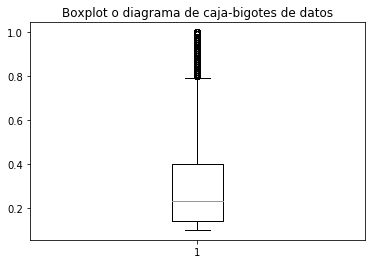

In [17]:
plt.boxplot(datos) 
plt.title('Boxplot o diagrama de caja-bigotes de datos') 
plt.show()

El rectángulo tiene como techo el tercer cuartil y como suelo el primer cuartil. La línea gruesa que atraviesa el rectángulo horizontalmente es la mediana. La línea vertical indica hasta dónde llegan los datos no atípicos. Cada dato atípico viene indicado con un círculo. 

Podemos también dibujar el histograma de los datos:

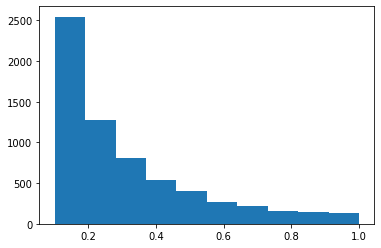

In [18]:
plt.hist(datos, density=False)
plt.show()

<font color="blue"> Se quiere partir los datos en tres categorías de modo que en la primera esté el 20 $\%$ de los juegos menos vendidos, en la tercera el 20 $\%$ de los más vendidos y los demás en la categoría dos. ¿Cómo puede hacerse? Comprueba que en la primera categoría hay aproximadamente un 20 $\%$ de los datos ¿por qué no hay exactamente el 20 $\%$?</font>


<strong> Solución. </strong> Tenemos que partir los datos de la siguiente manera:



#       20%        60%       20%
#       ----|----------------|----
#     cat1        cat 2             cat3


In [19]:
cat1=np.quantile(datos,0.2)
cat3=np.quantile(datos,0.8)
datos_cat1=datos[(datos <= cat1)]
datos_cat2=datos[(datos > cat1) & (datos < cat3)]
datos_cat3=datos[(datos >= cat3)]

Ahora comprobamos el tamaño de la primera categoría de datos filtrada, que debería ser del 20$\%$:


In [20]:
len(datos_cat1)/len(datos)

0.2158495220474869

Se obtiene un valor un poco por encima del 20$\%$ porque muchos de los valores de datos$\_$cat1 son iguales a cat1.

Ahora respondemos a:
    
<font color="blue"> 
*  Dibuja los histogramas de las variables VentasEU, VentasEEUU, VentasOtros, filtradas previamente para que se consideren solo valores de las variables en el intervalo $]0.1, 1[$. Dibuja también un histograma de la variable Fecha.
</font>

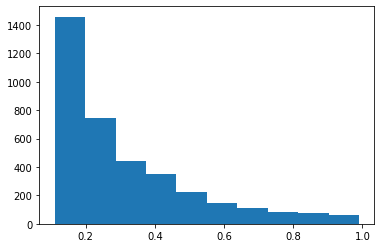

In [21]:
VentasEU=juegos["VentasEU"]
Filtro2=VentasEU[(VentasEU > 0.1) & (VentasEU < 1)]
plt.hist(Filtro2, density=False)
plt.show()

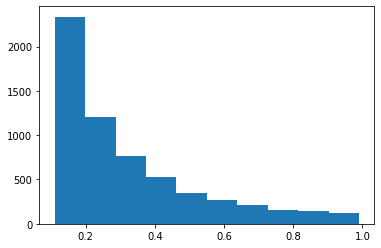

In [22]:
VentasEEUU=juegos["VentasEEUU"]
Filtro1=VentasEEUU[(VentasEEUU > 0.1) & (VentasEEUU < 1)]
plt.hist(Filtro1, density=False)
plt.show()

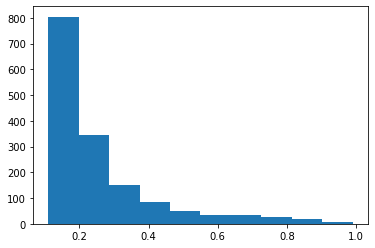

In [23]:
VentasOtros=juegos["VentasOtros"]
Filtro3=VentasOtros[(VentasOtros > 0.1) & (VentasOtros < 1)]
plt.hist(Filtro3, density=False)
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


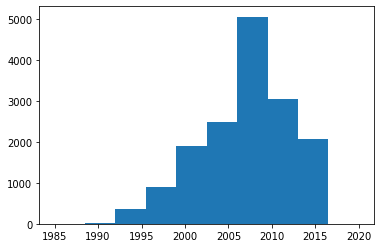

In [24]:
Fecha=juegos["Fecha"]
plt.hist(Fecha, density=False)
plt.show()

La advertencia que ha aparecido en la respuesta de Python a la orden anterior se debe a que hay entradas en Fecha con NaN (i.e., juegos que no tienen asignada una fecha). De hecho, podemos calcular cuántas veces sucede esto:

In [44]:
sum(Fecha.isna())

253

<font color="blue"> <strong> Ejercicio 2.</strong> Haz un estudio de los datos en VentasJP de aquellos datos que estén entre 0.5 y 1. Es decir: dibuja el histograma, calcula media y varianza, parte los datos en los grupos dados por el histograma, haz la tabla de todas las frecuencias de los datos partidos. Calcula los cuartiles, indica mediana, RIC y datos atípicos de los datos, dibuja el boxplot y comenta qué significa.</font>


<strong>Solución.</strong>    
Comenzamos filtrando los datos de VentasJP para considerar solo aquellos contenidos en el intervalo $]0.5,1[$:

In [26]:
VentasJP=juegos["VentasJP"]
V_JP_S=VentasJP[(VentasJP>0.5)&(VentasJP<1)]

Ahora dibujamos el histograma:

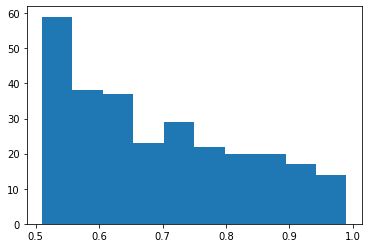

In [27]:
plt.hist(V_JP_S, density=False)
plt.show()

Ahora calculamos la media y la varianza (como N es grande, prescindimos de multiplicar por (N-1)/N a la varianza calculada por Python, aunque aquí hago las dos cuentas para que se vea que no hay gran diferencia)

In [28]:
np.mean(V_JP_S)

0.6927956989247315

In [29]:
np.var(V_JP_S) 

0.0188459475083825

In [30]:
N=len(V_JP_S)
np.var(V_JP_S)*(N-1)/N

0.018778399309427724

Ahora partimos los datos de acuerdo con el histograma:

In [31]:
cortes=np.histogram(V_JP_S)[1]
cortes

array([0.51 , 0.558, 0.606, 0.654, 0.702, 0.75 , 0.798, 0.846, 0.894,
       0.942, 0.99 ])

In [32]:
V_JP_S_agrupados=pd.cut(
    V_JP_S,
    bins = cortes,
    right=True,
    include_lowest=True
)
V_JP_S_agrupados

11       (0.942, 0.99]
26      (0.606, 0.654]
45      (0.798, 0.846]
76      (0.654, 0.702]
81       (0.942, 0.99]
             ...      
3604    (0.509, 0.558]
3631    (0.509, 0.558]
3641    (0.509, 0.558]
3670    (0.509, 0.558]
3672    (0.509, 0.558]
Name: VentasJP, Length: 279, dtype: category
Categories (10, interval[float64]): [(0.509, 0.558] < (0.558, 0.606] < (0.606, 0.654] < (0.654, 0.702] ... (0.798, 0.846] < (0.846, 0.894] < (0.894, 0.942] < (0.942, 0.99]]

In [33]:
counts = V_JP_S_agrupados.value_counts()
counts

(0.509, 0.558]    59
(0.558, 0.606]    38
(0.606, 0.654]    37
(0.702, 0.75]     34
(0.654, 0.702]    23
(0.846, 0.894]    20
(0.798, 0.846]    20
(0.894, 0.942]    17
(0.75, 0.798]     17
(0.942, 0.99]     14
Name: VentasJP, dtype: int64

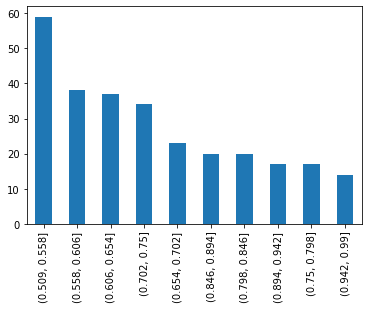

In [34]:
counts.plot(kind='bar')
plt.show()

In [35]:
ni = counts
fi = ni/len(V_JP_S)
Ni=np.cumsum(ni)
Fi=Ni/len(V_JP_S)
tabla_frecuencias = pd.DataFrame(
    {'Frecuencia Absoluta': ni, 
     'Frecuencia Relativa': fi, 
     'Frec. Absoluta Acumulada': Ni, 
     'Frec. Relativa Acumulada': Fi})
tabla_frecuencias 

,Frecuencia Absoluta,Frecuencia Relativa,Frec. Absoluta Acumulada,Frec. Relativa Acumulada
"(0.509, 0.558]",59,0.211470,59,0.211470
"(0.558, 0.606]",38,0.136201,97,0.347670
"(0.606, 0.654]",37,0.132616,134,0.480287
"(0.702, 0.75]",34,0.121864,168,0.602151
"(0.654, 0.702]",23,0.082437,191,0.684588
"(0.846, 0.894]",20,0.071685,211,0.756272
"(0.798, 0.846]",20,0.071685,231,0.827957
"(0.894, 0.942]",17,0.060932,248,0.888889
"(0.75, 0.798]",17,0.060932,265,0.949821
"(0.942, 0.99]",14,0.050179,279,1.000000


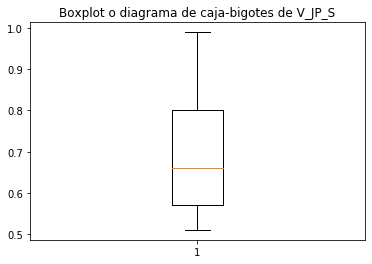

In [36]:
plt.boxplot(V_JP_S) 
plt.title('Boxplot o diagrama de caja-bigotes de V_JP_S') 
plt.show()

In [37]:
cuartiles=np.quantile(V_JP_S,np.arange(0.25,1,0.25))
cuartiles

array([0.57, 0.66, 0.8 ])

In [38]:
Q1,Q2,Q3=cuartiles

In [39]:
R=Q3-Q1
o1,o2=[Q1-1.5*R,Q3+1.5*R]
datos_atipicos = V_JP_S[(V_JP_S < o1) | (V_JP_S > o2)] 
datos_atipicos

Series([], Name: VentasJP, dtype: float64)

In [40]:
len(datos_atipicos)

0


<font color="blue">  <strong> Ejercicio 3. </strong>  Importa los datos del fichero "Juegos2.dat". Se pide:
* Construye las tablas de contingencia de Genero respecto a Fecha de frecuencias conjuntas absolutas y relativas.
  
* Dibuja el diagrama de barras de esa tabla.
*  Construye la tabla de frecuencias marginales.
* Construye las tablas de frecuencias condicionadas.
* Indica las siguientes frecuencias relativas:
* Proporción de juegos de plataformas que se han hecho en 2003.
* Proporción de juegos hechos en 2003.
* Proporción de juegos de deportes.
* Dentro de los juegos hechos en 2001, proporción de juegos de acción.
*  Dentro de los juegos de deportes, proporción de juegos hechos entre 2002 y 2004.
</font>



In [4]:
juegos2 = pd.read_csv('Juegos2.dat', delimiter=" ")
print(juegos2.head())

                                    Nombre Plataforma  Fecha    Genero  \
18           Grand Theft Auto: San Andreas        PS2   2004    Action   
25             Grand Theft Auto: Vice City        PS2   2002    Action   
39                    Grand Theft Auto III        PS2   2001    Action   
60                          Super Mario 64         DS   2004  Platform   
91  Grand Theft Auto: Liberty City Stories        PSP   2005    Action   

    VentasEEUU  VentasEU  VentasJP  VentasOtros  Ventas  
18        9.43      0.40      0.41        10.57   20.81  
25        8.41      5.49      0.47         1.78   16.15  
39        6.99      4.51      0.30         1.30   13.10  
60        5.08      3.11      1.25         0.98   10.42  
91        2.90      2.83      0.24         1.75    7.72  


In [5]:
juegos2.to_csv('Juegos2.csv', index=False)

In [6]:
# Cargar los datos del archivo 'Juegos2.dat'
juegos = pd.read_csv('Juegos2.csv')
juegos

,Nombre,Plataforma,Fecha,Genero,VentasEEUU,VentasEU,VentasJP,VentasOtros,Ventas
0,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,20.81
1,Grand Theft Auto: Vice City,PS2,2002,Action,8.41,5.49,0.47,1.78,16.15
2,Grand Theft Auto III,PS2,2001,Action,6.99,4.51,0.30,1.30,13.10
3,Super Mario 64,DS,2004,Platform,5.08,3.11,1.25,0.98,10.42
4,Grand Theft Auto: Liberty City Stories,PSP,2005,Action,2.90,2.83,0.24,1.75,7.72
...,...,...,...,...,...,...,...,...,...
1636,Razor Freestyle Scooter,GBA,2001,Sports,0.01,0.00,0.00,0.00,0.01
1637,E.T. The Extra-Terrestrial,GBA,2001,Action,0.01,0.00,0.00,0.00,0.01
1638,Planet Monsters,GBA,2001,Action,0.01,0.00,0.00,0.00,0.01
1639,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.00,0.01


In [7]:
# Mostrar las primeras filas del dataframe para ver su estructura
#print(juegos2.head())
print(juegos.columns)
juegos['Genero']

Index(['Nombre', 'Plataforma', 'Fecha', 'Genero', 'VentasEEUU', 'VentasEU',
       'VentasJP', 'VentasOtros', 'Ventas'],
      dtype='object')


0         Action
1         Action
2         Action
3       Platform
4         Action
          ...   
1636      Sports
1637      Action
1638      Action
1639    Platform
1640    Platform
Name: Genero, Length: 1641, dtype: object

In [8]:
# (a) Construir las tablas de contingencia de Genero respecto a Fecha
n_ij = pd.crosstab(juegos['Genero'], juegos['Fecha'])
print(n_ij)

Fecha     2001  2002  2003  2004  2005
Genero                                
Action      64   125   144   125   192
Platform    41    77    87    66    83
Sports      96   188   125   106   122


In [9]:
# Calcular las frecuencias relativas conjuntas
f_ij = n_ij / n_ij.sum().sum()
print(f_ij)

Fecha         2001      2002      2003      2004      2005
Genero                                                    
Action    0.039001  0.076173  0.087751  0.076173  0.117002
Platform  0.024985  0.046923  0.053016  0.040219  0.050579
Sports    0.058501  0.114564  0.076173  0.064595  0.074345


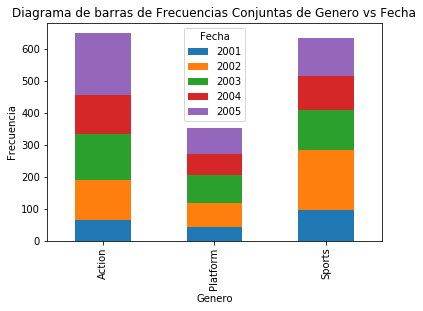

In [10]:
# (b) Dibujar el diagrama de barras
n_ij.plot(kind='bar', stacked=True)
plt.title('Diagrama de barras de Frecuencias Conjuntas de Genero vs Fecha')
plt.ylabel('Frecuencia')
plt.show()

In [11]:
# (c) Construir la tabla de frecuencias marginales
marginales_absolutas = n_ij.sum(axis=1)  # Marginales por filas (Genero)
print(marginales_absolutas)

Genero
Action      650
Platform    354
Sports      637
dtype: int64


In [12]:
marginales_relativas = n_ij.sum(axis=1) / n_ij.sum().sum()  # Relativas por filas
print(marginales_relativas)

Genero
Action      0.396100
Platform    0.215722
Sports      0.388178
dtype: float64


In [13]:
# (d) Tablas de frecuencias condicionadas

# Frecuencias condicionadas por columnas (Genero condicionado a Fecha)
cond_columnas = n_ij.div(n_ij.sum(axis=0), axis=1)
print(cond_columnas)

Fecha         2001      2002      2003      2004      2005
Genero                                                    
Action    0.318408  0.320513  0.404494  0.420875  0.483627
Platform  0.203980  0.197436  0.244382  0.222222  0.209068
Sports    0.477612  0.482051  0.351124  0.356902  0.307305


In [14]:
# Mostrar frecuencias condicionadas por columnas en porcentaje
cond_columnas_percent = cond_columnas * 100
print(cond_columnas_percent)



Fecha          2001       2002       2003       2004       2005
Genero                                                         
Action    31.840796  32.051282  40.449438  42.087542  48.362720
Platform  20.398010  19.743590  24.438202  22.222222  20.906801
Sports    47.761194  48.205128  35.112360  35.690236  30.730479


In [15]:
# Frecuencias condicionadas por filas (Fecha condicionada a Genero)
cond_filas = n_ij.div(n_ij.sum(axis=1), axis=0)
print(cond_filas)

Fecha         2001      2002      2003      2004      2005
Genero                                                    
Action    0.098462  0.192308  0.221538  0.192308  0.295385
Platform  0.115819  0.217514  0.245763  0.186441  0.234463
Sports    0.150706  0.295133  0.196232  0.166405  0.191523


In [16]:
# Mostrar frecuencias condicionadas por filas en porcentaje
cond_filas_percent = cond_filas * 100
print(cond_filas_percent)

Fecha          2001       2002       2003       2004       2005
Genero                                                         
Action     9.846154  19.230769  22.153846  19.230769  29.538462
Platform  11.581921  21.751412  24.576271  18.644068  23.446328
Sports    15.070644  29.513344  19.623234  16.640502  19.152276


In [18]:
# (e) Frecuencias relativas:

# Proporción de juegos de plataformas que se han hecho en 2003
prop_plataformas_2003 = f_ij.loc['Platform', 2003] * 100
print(f'Proporción de juegos de plataformas que se han hecho en 2003: {prop_plataformas_2003}%')

Proporción de juegos de plataformas que se han hecho en 2003: 5.301645338208409%


In [19]:
# Proporción de juegos hechos en 2003
prop_juegos_2003 = f_ij.loc[:, 2003].sum() * 100
print(f'Proporción de juegos hechos en 2003: {prop_juegos_2003}%')

Proporción de juegos hechos en 2003: 21.694088970140157%


In [20]:

# Proporción de juegos de deportes
prop_deportes = f_ij.loc['Sports', :].sum() * 100
print(f'Proporción de juegos de deportes: {prop_deportes}%')

Proporción de juegos de deportes: 38.81779402803169%


In [21]:
# Dentro de los juegos hechos en 2001, proporción de juegos de acción
prop_accion_2001 = cond_columnas.loc['Action', 2001] * 100
print(f'Proporción de juegos de acción hechos en 2001: {prop_accion_2001}%')

Proporción de juegos de acción hechos en 2001: 31.8407960199005%


In [22]:
# Dentro de los juegos de deportes, proporción de juegos hechos entre 2002 y 2004
prop_deportes_2002_2004 = cond_filas.loc['Sports', 2002:2004].sum() * 100
print(f'Proporción de juegos de deportes hechos entre 2002 y 2004: {prop_deportes_2002_2004}%')

Proporción de juegos de deportes hechos entre 2002 y 2004: 65.77708006279434%


In [23]:
# Ejercicio 4: Construcción de la tabla de contingencia
gen = ['Hombre', 'Hombre', 'Hombre', 'Mujer', 'Mujer', 'Mujer']
pelo = ['Castaño', 'Moreno', 'Rubio', 'Castaño', 'Moreno', 'Rubio']
frec = [12, 8, 5, 20, 10, 25]

# Construir la tabla de contingencia
tabla_contingencia = pd.crosstab(pd.Series(gen), pd.Series(pelo), values=frec, aggfunc='sum')
print(tabla_contingencia)



col_0   Castaño  Moreno  Rubio
row_0                         
Hombre       12       8      5
Mujer        20      10     25


count    38.000000
mean      0.825000
std       0.260776
min       0.510000
25%       0.555000
50%       0.830000
75%       1.032500
max       1.390000
Name: VentasJP, dtype: float64


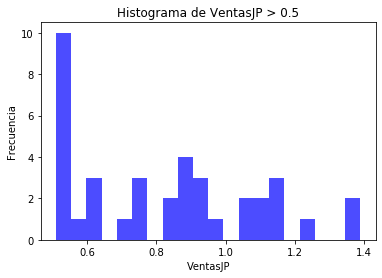

count    15.000000
mean      0.815333
std       0.212901
min       0.510000
25%       0.670000
50%       0.830000
75%       0.985000
max       1.130000
Name: VentasJP, dtype: float64


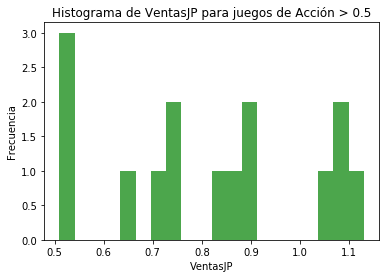

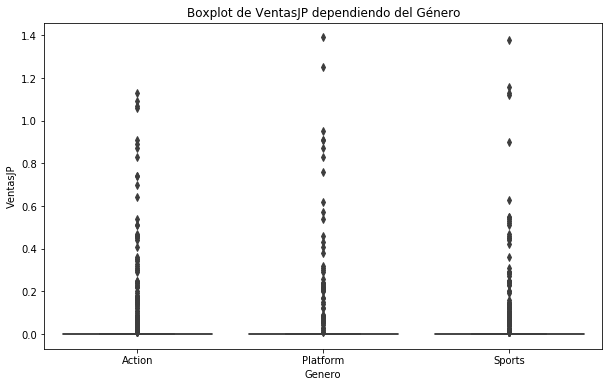

In [24]:

# Ejercicio 5: Análisis de las VentasJP mayores que 0.5
VentasJP = juegos2['VentasJP']

# (a) Sumario y histograma para VentasJP > 0.5
VentasJP_0_5 = VentasJP[VentasJP > 0.5]
print(VentasJP_0_5.describe())

# Histograma
plt.hist(VentasJP_0_5, bins=20, color='blue', alpha=0.7)
plt.title('Histograma de VentasJP > 0.5')
plt.xlabel('VentasJP')
plt.ylabel('Frecuencia')
plt.show()

# (b) Repetir para los datos de juegos de Acción
juegos_accion = juegos2[juegos2['Genero'] == 'Action']
VentasJP_accion = juegos_accion['VentasJP'][juegos_accion['VentasJP'] > 0.5]
print(VentasJP_accion.describe())

# Histograma
plt.hist(VentasJP_accion, bins=20, color='green', alpha=0.7)
plt.title('Histograma de VentasJP para juegos de Acción > 0.5')
plt.xlabel('VentasJP')
plt.ylabel('Frecuencia')
plt.show()

# (c) Boxplot dependiendo del género
plt.figure(figsize=(10, 6))
sns.boxplot(x='Genero', y='VentasJP', data=juegos2)
plt.title('Boxplot de VentasJP dependiendo del Género')
plt.show()

